<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-18 11:06:21--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  57.6MB/s    in 3.8s    

2025-03-18 11:06:25 (53.2 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas
!pip install matplotlib

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [4]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [8]:
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)
pd.set_option('display.max_columns', None)



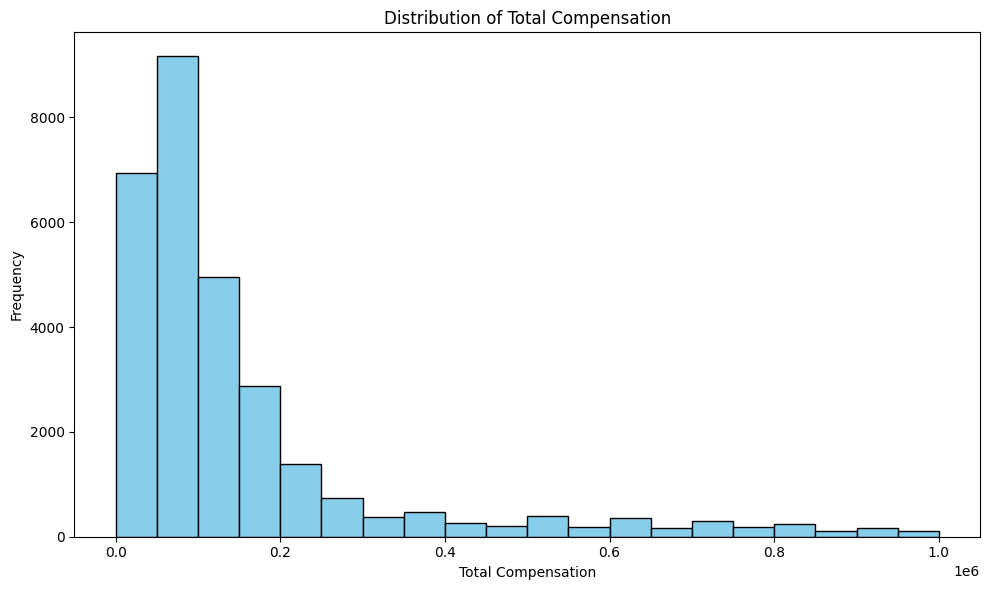

In [9]:
# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query to filter CompTotal
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
AND CompTotal > 0 
AND CompTotal < 1000000;
"""

# Load filtered data
df_filtered = pd.read_sql_query(QUERY, conn)

# Create the histogram
plt.figure(figsize=(10,6))
plt.hist(df_filtered['CompTotal'], bins=20, color='skyblue', edgecolor='black') 

plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation')

plt.tight_layout()
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


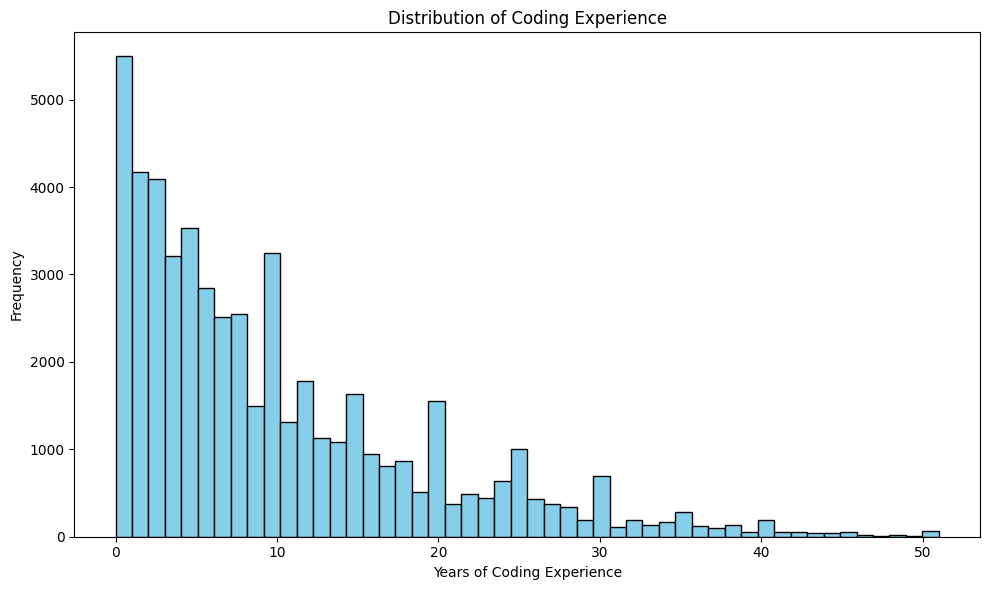

In [10]:
# SQL query to filter and replace values in YearsCodePro
QUERY = """
SELECT 
    CASE 
        WHEN YearsCodePro = 'Less than 1 year' THEN 0
        WHEN YearsCodePro = 'More than 50 years' THEN 51
        ELSE CAST(YearsCodePro AS INTEGER)
    END AS YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL;
"""

# Load filtered data
df_years_code = pd.read_sql_query(QUERY, conn)

# Create the histogram
plt.figure(figsize=(10,6))
plt.hist(df_years_code['YearsCodePro'], bins=50, color='skyblue', edgecolor='black')

plt.title('Distribution of Coding Experience')
plt.ylabel('Frequency')
plt.xlabel('Years of Coding Experience')

plt.tight_layout()
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


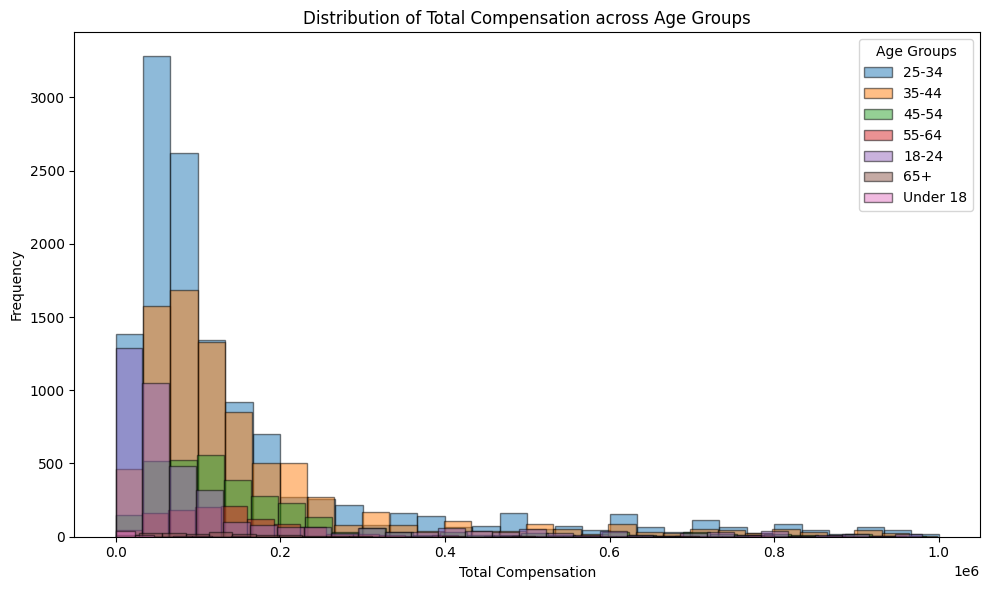

In [11]:
# SQL query to transform Age into AgeGroup and filter CompTotal
query = """
WITH transformed_data AS (
    SELECT 
        CASE 
            WHEN Age = 'Under 18 years old' THEN 'Under 18'
            WHEN Age = '18-24 years old' THEN '18-24'
            WHEN Age = '25-34 years old' THEN '25-34'
            WHEN Age = '35-44 years old' THEN '35-44'
            WHEN Age = '45-54 years old' THEN '45-54'
            WHEN Age = '55-64 years old' THEN '55-64'
            WHEN Age = '65 years or older' THEN '65+'
            ELSE NULL
        END AS AgeGroup,
        CompTotal
    FROM main
    WHERE CompTotal IS NOT NULL
        AND CompTotal > 0 
        AND CompTotal < 1000000
        AND Age IS NOT NULL
)
SELECT AgeGroup, CompTotal
FROM transformed_data;
"""

# Execute the query and load the result
df = pd.read_sql_query(query, conn)

# Plotting histogram by age group
plt.figure(figsize=(10, 6))
age_groups = df['AgeGroup'].unique()

# Plot each Age Group's histogram
for age_group in age_groups:
    subset = df[df['AgeGroup'] == age_group]
    plt.hist(subset['CompTotal'], bins=30, alpha=0.5, label=age_group, edgecolor='black')

# Set plot labels and title
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation across Age Groups')
plt.legend(title='Age Groups')
plt.tight_layout()
plt.show()

        

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


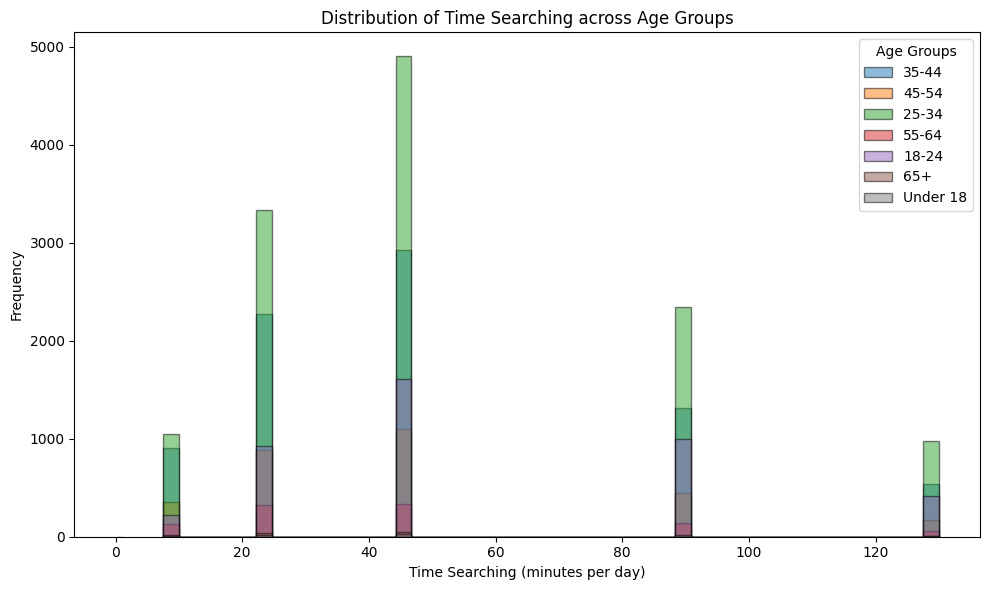

In [12]:
# SQL query to transform TimeSearching and AgeGroup, and filter CompTotal
query = """
WITH transformed_data AS (
    SELECT 
        CASE 
            WHEN Age = 'Under 18 years old' THEN 'Under 18'
            WHEN Age = '18-24 years old' THEN '18-24'
            WHEN Age = '25-34 years old' THEN '25-34'
            WHEN Age = '35-44 years old' THEN '35-44'
            WHEN Age = '45-54 years old' THEN '45-54'
            WHEN Age = '55-64 years old' THEN '55-64'
            WHEN Age = '65 years or older' THEN '65+'
            ELSE NULL
        END AS AgeGroup,
        CASE 
            WHEN TimeSearching = 'Less than 15 minutes a day' THEN 7.5
            WHEN TimeSearching = '15-30 minutes a day' THEN 22.5
            WHEN TimeSearching = '30-60 minutes a day' THEN 45
            WHEN TimeSearching = '60-120 minutes a day' THEN 90
            WHEN TimeSearching = 'Over 120 minutes a day' THEN 130
            ELSE NULL
        END AS TimeSearching
    FROM main
    WHERE TimeSearching IS NOT NULL
        AND Age IS NOT NULL
)
SELECT AgeGroup, TimeSearching
FROM transformed_data;
"""

# Execute the query and load the result
df = pd.read_sql_query(query, conn)

# Plotting histogram by age group
plt.figure(figsize=(10, 6))
age_groups = df['AgeGroup'].unique()

# Plot each Age Group's histogram
for age_group in age_groups:
    subset = df[df['AgeGroup'] == age_group]
    plt.hist(subset['TimeSearching'], bins=50, alpha=0.5, label=age_group, edgecolor='black')

# Set plot labels and title
plt.xlabel('Time Searching (minutes per day)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Searching across Age Groups')
plt.legend(title='Age Groups')
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [14]:
# Step 1: Eliminate NULL values and split the answers into permanent table
QUERY = """
CREATE TABLE IF NOT EXISTS permanent_databases AS
SELECT TRIM(SUBSTR(DatabaseWantToWorkWith, 1, INSTR(DatabaseWantToWorkWith, ';') - 1)) AS Database
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
UNION ALL
SELECT TRIM(SUBSTR(DatabaseWantToWorkWith, INSTR(DatabaseWantToWorkWith, ';') + 1, 
                 LENGTH(DatabaseWantToWorkWith) - INSTR(DatabaseWantToWorkWith, ';'))) AS Database
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL;
"""

# Execute the query to create the table
conn.execute(QUERY)
conn.commit()



In [15]:
# Step 2: Get top 5 most desired databases
QUERY = """
SELECT Database, COUNT(*) AS Frequency
FROM permanent_databases
WHERE Database != ''
GROUP BY Database
ORDER BY Frequency DESC
LIMIT 5;
"""

# Execute the query and load the result into a DataFrame
df_databases = pd.read_sql_query(QUERY, conn)

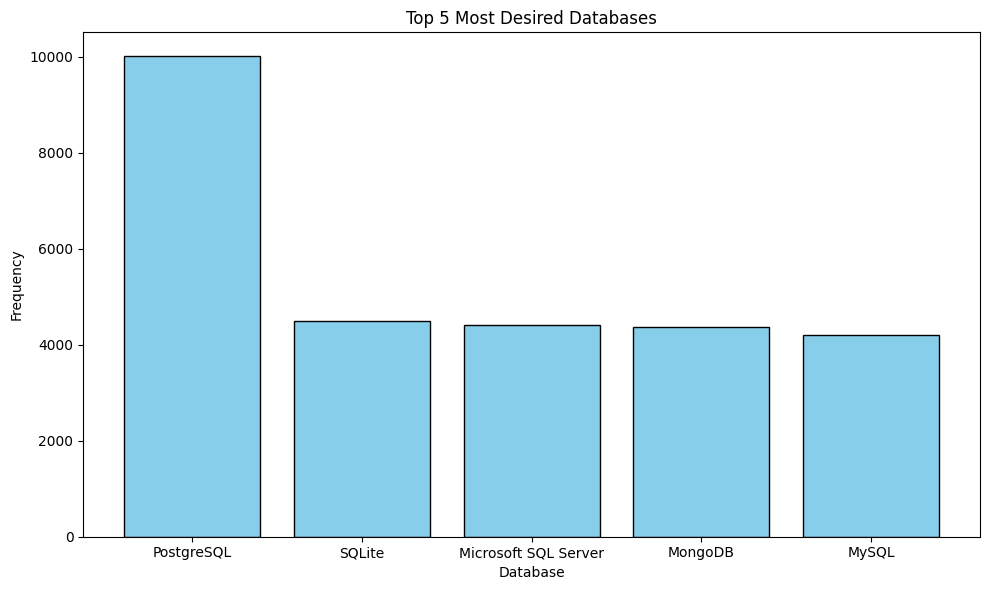

In [16]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(df_databases['Database'], df_databases['Frequency'], color='skyblue', edgecolor='black')
plt.title('Top 5 Most Desired Databases')
plt.ylabel('Frequency')
plt.xlabel('Database')

plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


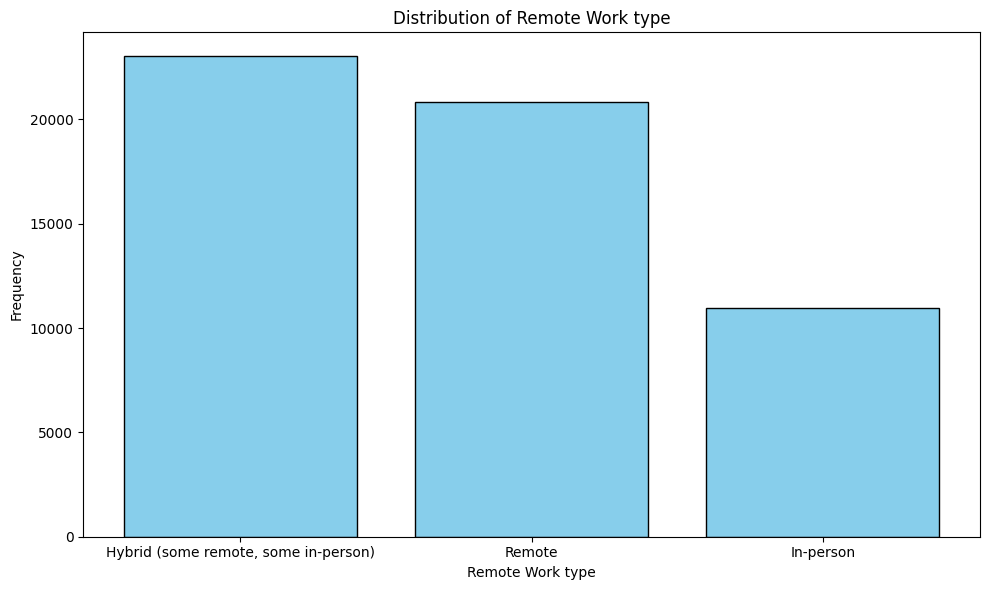

In [17]:
# SQL Query to count frequencies of different remote work 
QUERY = """
SELECT RemoteWork, COUNT(*) AS Frequency
FROM main
WHERE RemoteWork IS NOT NULL
GROUP BY RemoteWork
ORDER BY Frequency DESC;
"""

# Execute the query and load the result into a DataFrame
df_remote_work = pd.read_sql_query(QUERY, conn)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(df_remote_work['RemoteWork'], df_remote_work['Frequency'], color='skyblue', edgecolor='black')
plt.title('Distribution of Remote Work type')
plt.ylabel('Frequency')
plt.xlabel('Remote Work type')

plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


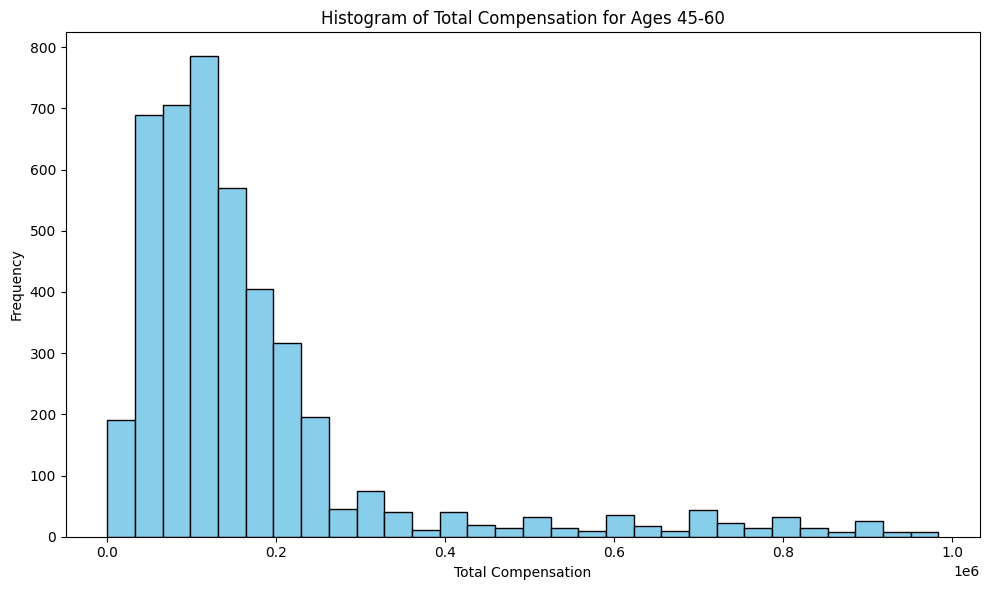

In [18]:
# SQL Query to convert age ranges to numeric values, filter by age group (45 to 60), and clean CompTotal
QUERY = """
WITH age_converted AS (
    SELECT 
        CASE
            WHEN Age = 'Under 18 years old' THEN 17
            WHEN Age = '18-24 years old' THEN 21
            WHEN Age = '25-34 years old' THEN 30
            WHEN Age = '35-44 years old' THEN 40
            WHEN Age = '45-54 years old' THEN 50
            WHEN Age = '55-64 years old' THEN 60
            WHEN Age = '65 years or older' THEN 70
            ELSE NULL
        END AS Age_numeric,
        CompTotal
    FROM main
    WHERE CompTotal IS NOT NULL
        AND CompTotal > 0 
        AND CompTotal < 1000000
        AND Age IS NOT NULL
)
-- Now, filter to get the rows where the Age is between 45 and 60
SELECT CompTotal
FROM age_converted
WHERE Age_numeric >= 45 AND Age_numeric <= 60;
"""

# Execute the query and load the result into a DataFrame
df_age_filtered = pd.read_sql_query(QUERY, conn)

# Create the histogram for CompTotal within the filtered age group
plt.figure(figsize=(10, 6))
plt.hist(df_age_filtered['CompTotal'], bins=30, color='skyblue', edgecolor='black')

plt.title('Histogram of Total Compensation for Ages 45-60')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


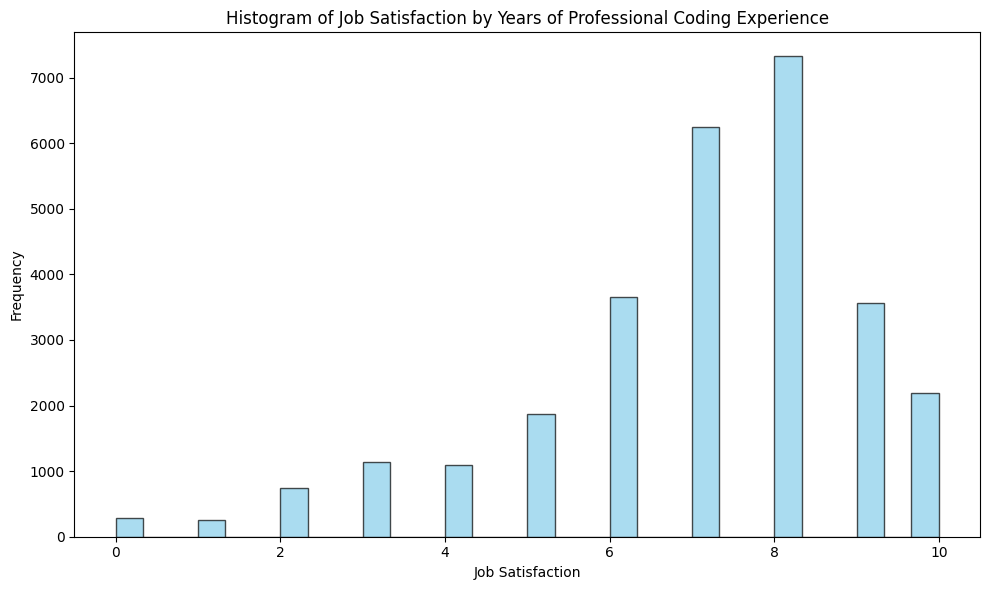

In [19]:
# SQL Query to filter rows where JobSat and YearsCodePro are not null
QUERY = """
SELECT JobSat, YearsCodePro
FROM main
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL;
"""
# Execute the query and load the result into a DataFrame
df_job_sat = pd.read_sql_query(QUERY, conn)

# Create the histogram for JobSat based on YearsCodePro
plt.figure(figsize=(10,6))
plt.hist(df_job_sat['JobSat'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Histogram of Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction')
plt.ylabel ('Frequency')

plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [20]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
